[2025-06-20 Fiddler](https://thefiddler.substack.com/p/how-greedily-can-you-mow-the-lawn)
====================

Fiddler
-------
My initial guess is 4.  The first pass goes right through the center.
The second pass is the same, rotated by 90°.  The last two passes clear
the remaining 4 patches.  I don't know if it's possible for the third
pass to clear more than half of what remains.  Eyeballing, I'd say no.

Any rotation of the second pass away from 90° from the first pass increases its
overlap with the first pass, and any translation of the second pass from being
centered at the circle center, unless the rotation is less than 60° from the first
pass, decreases the amount cut.

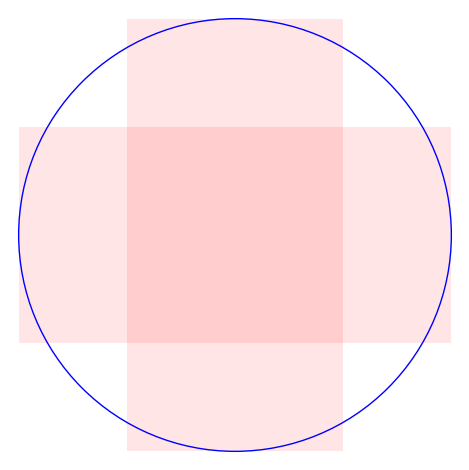

In [1]:
(circle((0,0),1,axes=false)
 + polygon([(-1/2,1),(1/2,1),(1/2,-1),(-1/2,-1)],color='red',alpha=0.1)
 + polygon([(1,1/2),(1,-1/2),(-1,-1/2),(-1,1/2)],color='red',alpha=0.1)
)

In [2]:
pass1 = 4*integral(sqrt(1-x^2),x,0,1/2)
pass2 = pass1 - 1
pass3 = (pi - pass1 - pass2)/2
show((pass1,pass2,pass3))
(numerical_approx(pass1/pi),numerical_approx(pass2/pi),numerical_approx(pass3/pi))

(1/3*pi + 1/2*sqrt(3), 1/3*pi + 1/2*sqrt(3) - 1, 1/6*pi - 1/2*sqrt(3) + 1/2)

(0.608997781044229, 0.290687894860439, 0.0501571620476660)

So the first pass gets about 60.9%, the second pass gets about 29.1%, and
the third and fourth passes get about 5.0%.

Extra credit
------------
The first pass clearly must be centered around the center of the sphere, boring out
approximately 35% of the volume.

In [3]:
pass1 = pi/4*sqrt(3) + 2*integral(pi*(1-x^2), x, sqrt(3)/2, 1)
show(pass1)
numerical_approx(pass1/(4*pi/3))

-1/12*pi*(9*sqrt(3) - 16) + 1/4*sqrt(3)*pi

0.350480947161671

I'm guessing that the second and third passes are also centered around the center
of the sphere, but rotated 90° from the first pass and each other.  I'm finding it
difficult to picture what the fourth pass could be.

Another candidate for the second or third pass would be parallel to the first pass.

The 3rd-4th-5th-6th passes could also be perpendicular to the first and second passes,
but offset from the center.

Consider a first pass offset from the center by $r$, the volume carved out would be

In [4]:
if false:
    r,x,y = var("r,x,y")
    assume(r >= 0, r < 3/2, x >= -1, x <= 1, y >= 0, y <= 1)
    assume(-1/2 <= x-r, x-r <= 1/2)
    pass1r = 4*integral(integral(sqrt(1-x^2-y^2),
                                 y, 0, min_symbolic(sqrt(1/4 - (x-r)^2),sqrt(1-x^2))),
                        x, r-1/2, min_symbolic(r+1/2,1))

and the computer cannot handle this integral.  Restricting it to $r \le 1/2$,

In [5]:
if false:
    r,x,y = var("r,x,y")
    assume(r >= 0, r < 1/2, x >= -1, x <= 1, y >= 0, y <= 1)
    assume(-1/2 <= x-r, x-r <= 1/2)
    pass1ra = 4*integral(integral(sqrt(1-x^2-y^2), y, 0, sqrt(1/4 - (x-r)^2)), x, r-1/2, r+1/2)

and the computer can't do this either.

If the second and third passes are both centered and perpedicular to
each other and the first pass, they would bore out approximately 19% and 17%.

In [6]:
x,y = var('x,y')
pass2 = pass1 - 8*integral(integral(sqrt(1/4-y^2),y,0,sqrt(1/4-x^2)),x,0,1/2)
show(pass2)
assume(x > 0, x < 1/2)
pass3 = pass1 - 16*integral(integral(sqrt(1/4-y^2),y,0,x),x,0,1/sqrt(8)) \
    - 16*integral(integral(sqrt(1/4-y^2),y,0,sqrt(1/4-x^2)),x,1/sqrt(8),1/2)
show(pass3)
numerical_approx(pass2/(4*pi/3)),numerical_approx(pass3/(4*pi/3))

-1/12*pi*(9*sqrt(3) - 16) + 1/4*sqrt(3)*pi - 2/3

-1/12*pi*(9*sqrt(3) - 16) + 1/4*sqrt(3)*pi - 1/24*sqrt(2)*(3*pi - 8*sqrt(2) + 10) + 1/24*sqrt(2)*(3*pi - 14)

(0.191326004069776, 0.172017271694652)

I believe the second pass is perpendicular to the first pass, but I'm not
sure if it is centered.  If it is, I believe the third pass would be centered
and perpendicular to the first and second passes.

The integrals for non-centered passes seem too difficult explore those possiblities
and I don't have analytically tractable ideas and I'm not familiar with any 3d
visualization tools, so the only idea I can think of is to numerically carve out
blocky approximations of cylinders from a blocky approximation of a sphere.

[The code is here](20250620.go).  The 2×2×2 cube in which the sphere is inscribed
is made of 401×401×401 = 64,481,201 cubical blocks in this numerical calculation.

    $ go run 20250620.go
    pass 1: 21763068/33507885 0.649491
    perpendicular centered pass 2: 15353028/33507885 0.458191
    perpendicular centered pass 3: 9586476/33507885 0.286096
    diagonal face pass 4: 7074818/33507885 0.211139
    diagonal face pass 5: 4726444/33507885 0.141055
    diagonal face pass 6: 2378070/33507885 0.070970
    diagonal face pass 7: 192980/33507885 0.005759
    edge center diagonal pass 8: 152386/33507885 0.004548
    edge center diagonal pass 9: 111792/33507885 0.003336
    edge center diagonal pass 10: 83844/33507885 0.002502
    edge center diagonal pass 11: 55896/33507885 0.001668
    edge center diagonal pass 12: 27948/33507885 0.000834
    edge center diagonal pass 13: 0/33507885 0.000000

To visualize, consider the sphere inscribed in a cube.  Initial numerical explorations
suggest that the first three passes are centered on opposing faces of the cube and
passing through the center of the sphere.

The numerical results agree with my calculations of the first three passes
taking out 35%, 19%, and 17% of the sphere.

After the first three passes, the 8 largest remaining concentrations are under the
8 corners of the cube, so each of the next 4 passes should carve out 2 of the corners,
either along an edge of the cube, diagonally across the face of a cube, or diagonally
through the center of the cube.  Numerical exploration suggests that the next 4 passes
are diagonally across a face of the cube.

After the first 7 passes, there are a bunch of disjoint fragments remaining representing
approximately 0.6% of the original volume, which I think takes 6 more passes, each
centered at the center of opposing edges of the cube and passing through the center of
the sphere, for a total of 13 passes.

Digression
----------
As an exercise, consider if all the cylinders have to be parallel,
then it might take 10 passes.  I suspect passes 2 and 3 might carve
out marginally more when moved a little away from the center, but
the curvature of the sphere making its cross-section smaller away
from its midsection could negate this.  (Subsequent numerical
exploration suggests that passes 2 and 3 are closer to 0.545 away
from the center rather than the 0.5 shown here.)  Unfortunately, this
exercise failed to give me any insight.

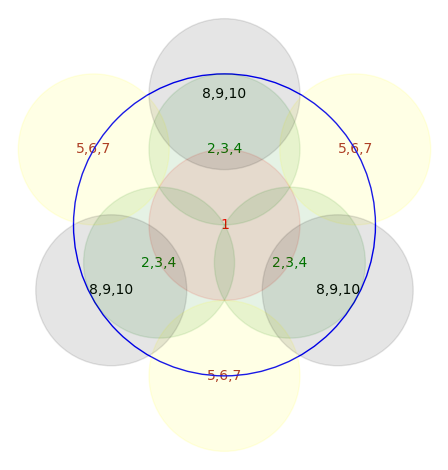

In [7]:
(circle((0,0),1,axes=false)
 + circle((0,0),1/2,color='red',fill=true,alpha=0.1)
 + circle((0,1/2),1/2,color='green',fill=true,alpha=0.1)
 + circle((sqrt(3)/4,-1/4),1/2,color='green',fill=true,alpha=0.1)
 + circle((-sqrt(3)/4,-1/4),1/2,color='green',fill=true,alpha=0.1)
 + circle((0,-1),1/2,color='yellow',fill=true,alpha=0.1)
 + circle((sqrt(3)/2,1/2),1/2,color='yellow',fill=true,alpha=0.1)
 + circle((-sqrt(3)/2,1/2),1/2,color='yellow',fill=true,alpha=0.1)
 + circle((0,sqrt(3)/2),1/2,color='black',fill=true,alpha=0.1)
 + circle((3/4,-sqrt(3)/4),1/2,color='black',fill=true,alpha=0.1)
 + circle((-3/4,-sqrt(3)/4),1/2,color='black',fill=true,alpha=0.1)
 + text("1",(0,0),color='red')
 + text("2,3,4",(0,1/2),color='green')
 + text("2,3,4",(sqrt(3)/4,-1/4),color='green')
 + text("2,3,4",(-sqrt(3)/4,-1/4),color='green')
 + text("5,6,7",(0,-1),color='brown')
 + text("5,6,7",(sqrt(3)/2,1/2),color='brown')
 + text("5,6,7",(-sqrt(3)/2,1/2),color='brown')
 + text("8,9,10",(0,sqrt(3)/2),color='black')
 + text("8,9,10",(3/4,-sqrt(3)/4),color='black')
 + text("8,9,10",(-3/4,-sqrt(3)/4),color='black')
)

Making the $\lfloor$rounds$\rceil$
----------------------------------
Region $R$ is clearly the annulus between circles of radii $\sqrt{98}$ and $\sqrt{99}$,
so its area is $\pi$.

For region $Q$, when $n \le x^2 < n+1$, $98-n \le y^2 < 99-n$, and its area
is slightly more than $\pi$.

In [8]:
q = 4*sum([(sqrt(n+1)-sqrt(n))*(sqrt(99-n)-sqrt(98-n)) for n in [0..98]])
numerical_approx(q)

3.14201553570153

For region $P$,
when $\sqrt{n} \le x < \sqrt{n+1}$, $\sqrt{98-n} \le y < \sqrt{99-n}$ for $n \in 0 \ldots 98$,
or $-\sqrt{98-n} \le y < -\sqrt{97-n}$ for $n \in 0 \ldots 97$.

When $-\sqrt{n} \le x < -\sqrt{n-1}$, $\sqrt{98-n} \le y < \sqrt{99-n}$ for $n \in 1 \ldots 98$,
or $-\sqrt{98-n} \le y < -\sqrt{97-n}$ for $n \in 1 \ldots 97$.

In [9]:
p = (sum([(sqrt(n+1)-sqrt(n))*(sqrt(99-n)-sqrt(98-n)) for n in [0..98]])
     + sum([(sqrt(n+1)-sqrt(n))*(sqrt(98-n)-sqrt(97-n)) for n in [0..97]])
     + sum([(sqrt(n)-sqrt(n-1))*(sqrt(99-n)-sqrt(98-n)) for n in [1..98]])
     + sum([(sqrt(n)-sqrt(n-1))*(sqrt(98-n)-sqrt(97-n)) for n in [1..97]]))
numerical_approx(p)

3.14202207523422

So region $P$ is the largest and region $R$ is the smallest.